<a href="https://colab.research.google.com/github/amruthab91/spark_basics/blob/main/Kmeans_clustering_using_pyspark_for_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmeans clustering using pyspark for Customer Dataset

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=748684b04519a39e54f339fa0ef71eea75c915dab9c6d1a70c35871ca24dabbd
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
.master("local")\
.appName("ClusteringApp1")\
.enableHiveSupport()\
.config('spark.ui.port', '4050')\
.getOrCreate()

In [3]:
path = "/content/Customer.csv"

In [4]:
#Reading  onlineRetailfile
df = spark.read.csv(path,inferSchema=True,header=True)

In [5]:
df.show(7)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [6]:
df.columns

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

use printSchema(), observe the output ,just after the name of the column of our dataset we can see nullable = True which means there are some null values in that column.

In [7]:
df.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



Total number of Rows

In [8]:
df.count()

8950

In [9]:
# showing colmns having null values
df.filter(df.BALANCE.isNotNull()).show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [10]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|CUST_ID|BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|      0|      0|                0|        0|               0|                     0|           0|              

In [11]:
# counting how many time zero has appeared in a column
for c in df.columns:

  print(c,df.filter(col(c)==0).count())

CUST_ID 0
BALANCE 80
BALANCE_FREQUENCY 80
PURCHASES 2044
ONEOFF_PURCHASES 4302
INSTALLMENTS_PURCHASES 3916
CASH_ADVANCE 4628
PURCHASES_FREQUENCY 2043
ONEOFF_PURCHASES_FREQUENCY 4302
PURCHASES_INSTALLMENTS_FREQUENCY 3915
CASH_ADVANCE_FREQUENCY 4628
CASH_ADVANCE_TRX 4628
PURCHASES_TRX 2044
CREDIT_LIMIT 0
PAYMENTS 240
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 5903
TENURE 0


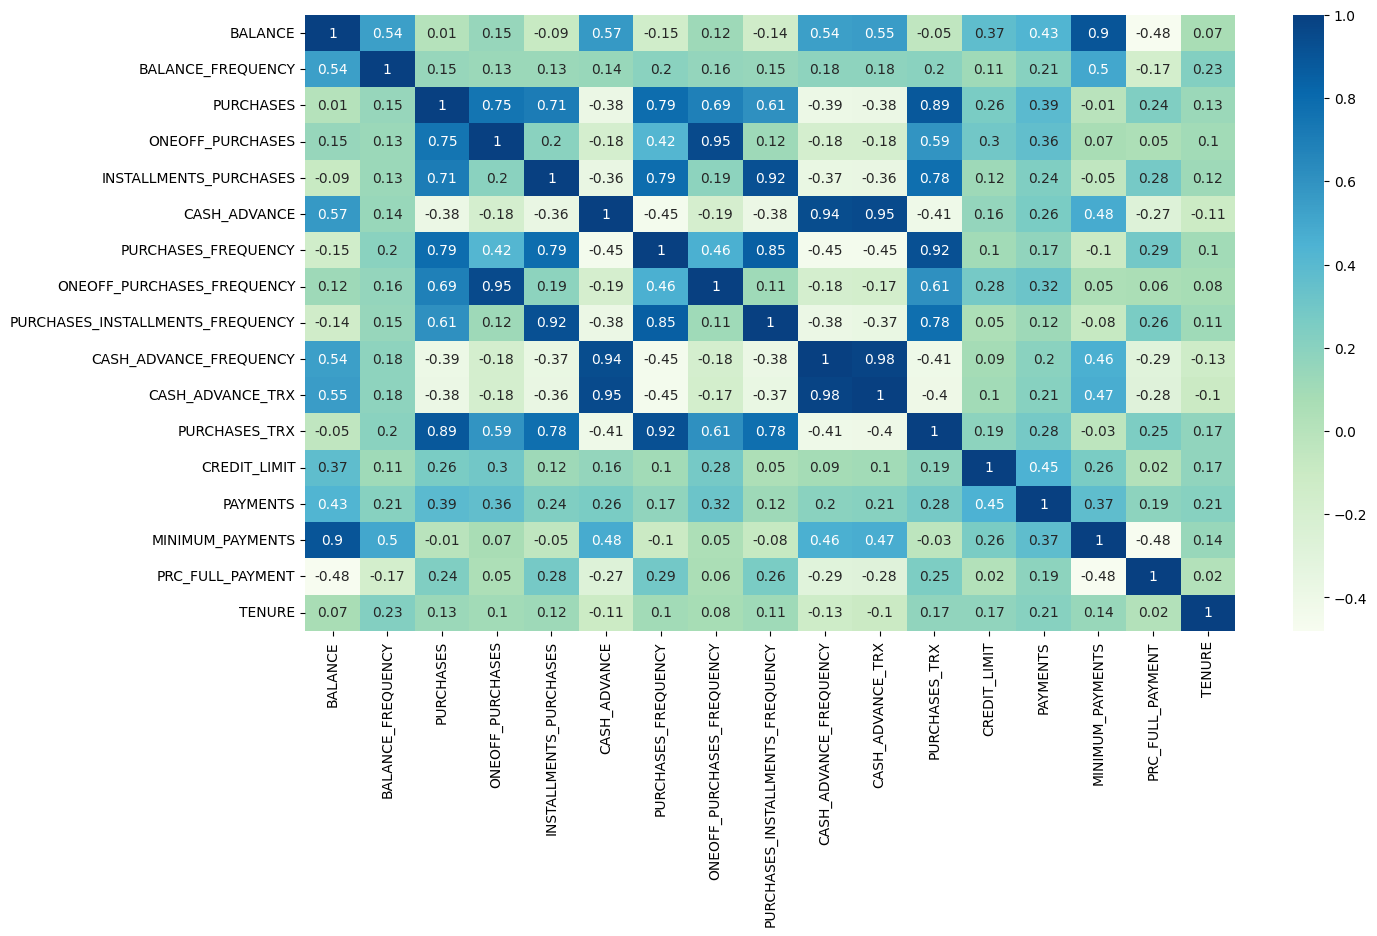

In [12]:
from os import pidfd_open
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


pddf= df.toPandas()

numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(15, 8))

sns.heatmap(round(pddf[numerical_features].corr(method='spearman'), 2),
            annot=True, mask=None, cmap='GnBu')
plt.show()

VectorAssembler Transformer takes all of the columns you specify and combines them into a new vector column.It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees. VectorAssembler accepts the following input column types: all numeric types, boolean type, and vector type. In each row, the values of the input columns will be concatenated into a vector in the specified order

**Explore the dataset using Pandas+Seaborn**

Correlation features[1:12]  0.10432322392432858
<class 'pyspark.sql.dataframe.DataFrame'>


<Axes: >

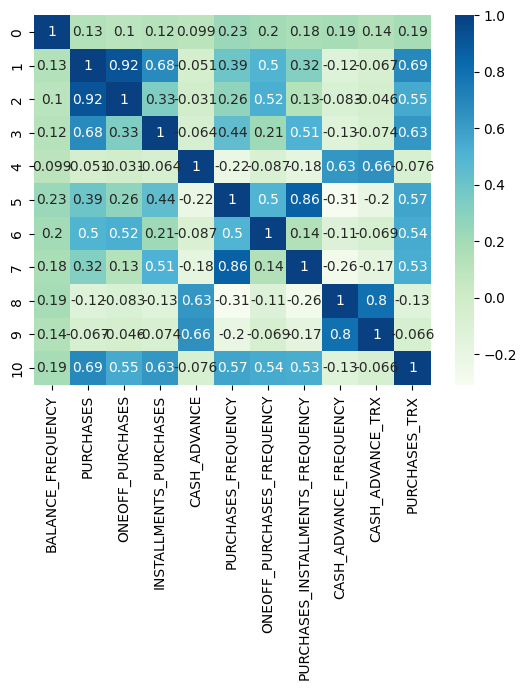

In [13]:
# Calculate Correlation Using Using MLlib
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Assemble feature vector
# Define the feature and label columns & Assemble the feature vector
vector_assembler = VectorAssembler(inputCols=numerical_features[1:12] , outputCol="features")
data_vector = vector_assembler.transform(df).select("features")

# Calculate correlation
correlation_matrix = Correlation.corr(data_vector, "features").head()[0]

print("Correlation features[1:12] ", correlation_matrix[0, 2])
df2 = spark.createDataFrame(correlation_matrix.toArray().tolist(),numerical_features[1:12])
print(type(df2))
sns.heatmap(df2.toPandas(),
            annot=True, mask=None, cmap='GnBu')

KMean Clustering

In [14]:
from pyspark.ml.feature import VectorAssembler
ClusteringColumns = ['BALANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

ClusteringColumns = [
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']

assembler=VectorAssembler(inputCols=ClusteringColumns, outputCol="features")
featureDf = assembler.transform(df)
featureDf.printSchema()
featureDf.show(10)

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)
 |-- features: vector (nullable = true)

+-------+-----------+-----------------+---------+----------------+----------------------+----------

In [15]:
#preparing data for clustering
featureDf.count()
trainingData, testData = featureDf.randomSplit([0.7, 0.3], seed = 5043)
print(type(trainingData))
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))
trainingData.show(10)
testData.columns

<class 'pyspark.sql.dataframe.DataFrame'>
Training Dataset Count: 6230
Test Dataset Count: 2720
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-------

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'features']

In [16]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
cluster_count = [5]#[10,30,50,70,90]
wssse_values =[]
for i in range(2,8):
  kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
  kmeansModel = kmeans.fit(trainingData)

  # test the model with test data set
  predictDf = kmeansModel.transform(testData)


  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(predictDf)

  wssse_values.append(silhouette)
  print("clusters= "+str(i) +" Silhouette with squared euclidean distance"+ str(silhouette))
  for clusters in kmeansModel.clusterCenters():
    print("cluster centres",clusters)

clusters= 2 Silhouette with squared euclidean distance0.7262330385019005
cluster centres [0.15687214 0.09449148 0.06073336]
cluster centres [0.88791336 0.33269989 0.72914872]
clusters= 3 Silhouette with squared euclidean distance0.7618353464955893
cluster centres [0.87409558 0.11123544 0.8246024 ]
cluster centres [0.1442863  0.07977909 0.06301707]
cluster centres [0.89149357 0.80361777 0.46950388]
clusters= 4 Silhouette with squared euclidean distance0.7508674978255471
cluster centres [0.8482545  0.07585216 0.79591875]
cluster centres [0.11433774 0.05992328 0.05262309]
cluster centres [0.72150848 0.66817892 0.11687568]
cluster centres [0.97346948 0.76418497 0.84295846]
clusters= 5 Silhouette with squared euclidean distance0.7556985880680238
cluster centres [0.95533308 0.08093867 0.91956748]
cluster centres [0.07993906 0.05904202 0.02009805]
cluster centres [0.54583307 0.09971671 0.45099293]
cluster centres [0.96728528 0.7766264  0.82385613]
cluster centres [0.73354081 0.70959732 0.0744

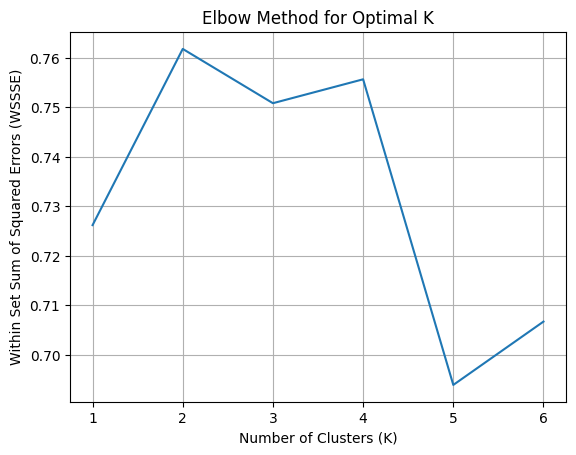

In [17]:
# Plotting WSSSE values
plt.plot(range(1, 7), wssse_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [18]:
# test the model with test data set
predictDf = kmeansModel.transform(testData)
predictDf.show(10)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictDf)
print("Silhouette with squared euclidean distance = " + str(silhouette))

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+----------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|prediction|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+-------

In [19]:
predictDf.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  521|
|         6|  154|
|         3|  387|
|         5|  103|
|         4|  148|
|         2| 1193|
|         0|  214|
+----------+-----+



In [20]:
pddf_pred = predictDf.toPandas()

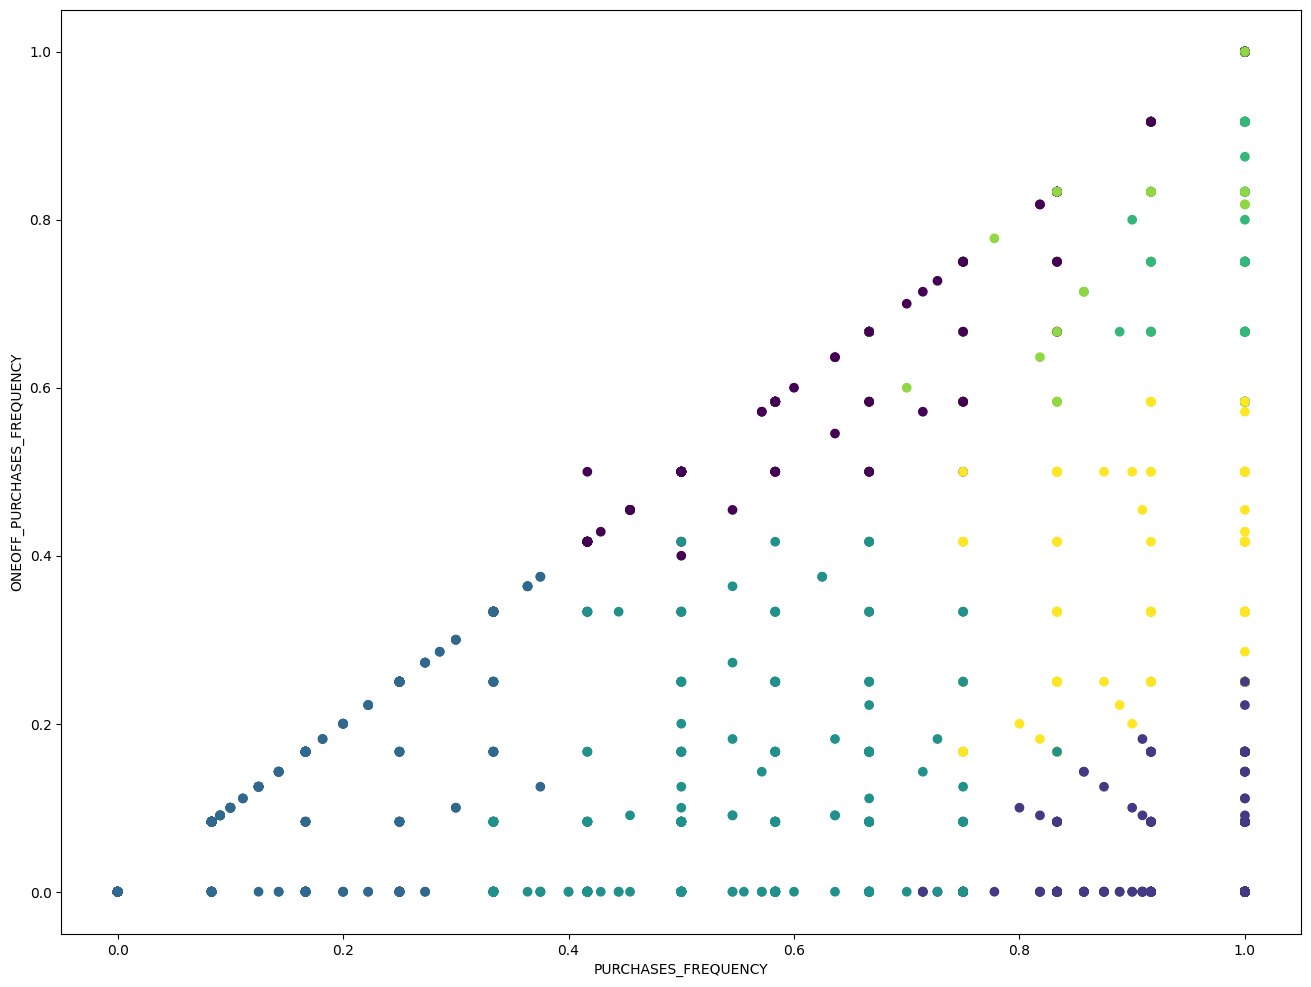

<Figure size 1200x1000 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
pddf_pred = predictDf.toPandas()
ClusteringColumns = ['BALANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
pddf_pred.head()
fig = plt.figure(figsize=(16,12))
KmVis= fig.add_subplot(111)
threedee = plt.figure(figsize=(12,10))
KmVis.scatter(pddf_pred.PURCHASES_FREQUENCY, pddf_pred.ONEOFF_PURCHASES_FREQUENCY,  c=pddf_pred.prediction)
KmVis.set_xlabel('PURCHASES_FREQUENCY')
KmVis.set_ylabel('ONEOFF_PURCHASES_FREQUENCY')

plt.show()

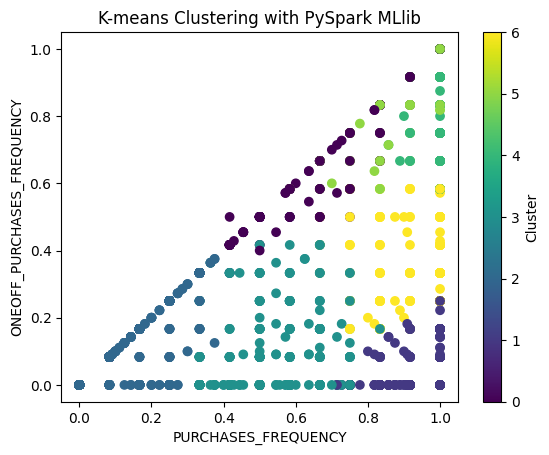

In [22]:
# Converting to Pandas DataFrame
clustered_data_pd = predictDf.toPandas()
# Visualizing the results
plt.scatter(clustered_data_pd["PURCHASES_FREQUENCY"], clustered_data_pd["ONEOFF_PURCHASES_FREQUENCY"], c=clustered_data_pd["prediction"], cmap='viridis')
plt.xlabel("PURCHASES_FREQUENCY")
plt.ylabel("ONEOFF_PURCHASES_FREQUENCY")
plt.title("K-means Clustering with PySpark MLlib")
plt.colorbar().set_label("Cluster")
plt.show()

In [23]:
fig = px.scatter_3d(clustered_data_pd, x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', z='PURCHASES_INSTALLMENTS_FREQUENCY', color='prediction', symbol='BALANCE', template='ggplot2', hover_name='CASH_ADVANCE_FREQUENCY')
fig.show()